The following project focus on the analysis of a dataset 'Bank Marketing' which contains data about customers and aims to get useful insights from the data and predict if a new customer will accept a deposit offer or not.<br>
The best ML algorithm resulted to be XGboost with a roc-auc score=0.79

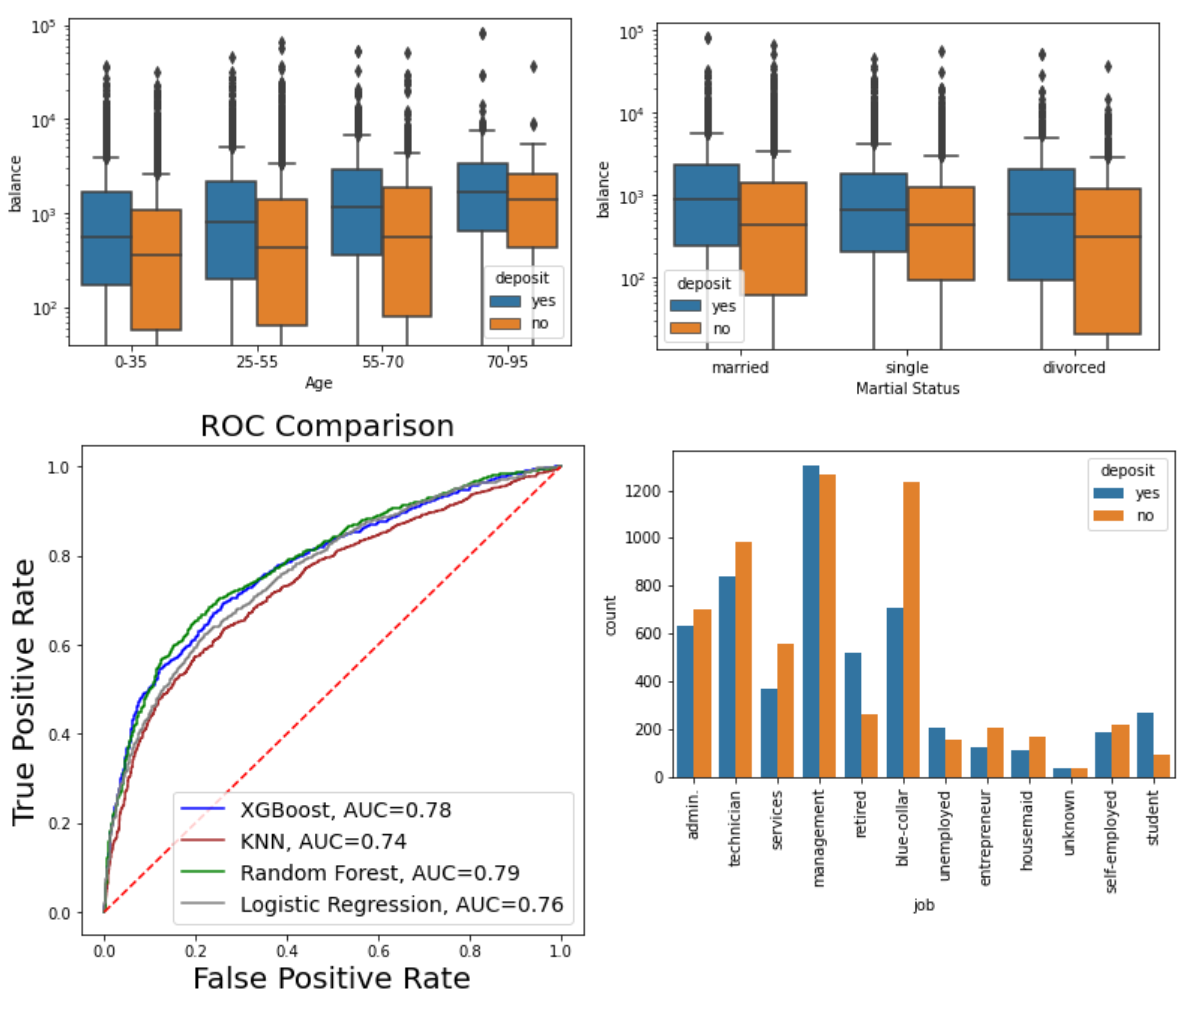

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv('../input/bank-marketing-dataset/bank.csv')

Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - balance: bank balance <br>
7 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
8 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
#### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone')<br>
10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
#### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
17 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')<br>



In [ ]:
df1.head()

We will first create a copy called 'df' of the original 'df1' dataset.

In [ ]:
df=df1.copy()

In [ ]:
df.columns

In [ ]:
df.info()

There no missing values and there are a lot of categorical features in the data. They will be analyzed first and then encoded before the ML training.

In [ ]:
df.describe()

Some first insights on the data:<br>
**Age:<br>**
the medium age is 41 years old.
the minimum age is 18 years old.
the maximum age is 95 years old.
<br>
**Balance:<br>**
The std deviation looks high (3225) compared to the mean (1528).<br>
<br>
Housing and deposit look balanced as their mean value is close to 0.5
<br>
From the column 'previous' we can see that most of the clients have been already contacted, since the value is close to 1 (0.8325)

As written in the dataset description, the duration column should be dropped since it includes an information which cannot be known before the call to the client.

In [ ]:
df=df.drop('duration', axis=1)

# Exploratory Data Analysis

To allow a better visualization, different palette will be chosen for the following plots.

In [ ]:
palette = {'yes':'red', 'no':'green'}

### We will first analyze the relationship between the categorical features and the target variable, which is 'deposit'

In [ ]:
sns.countplot(x= 'job', hue = 'deposit', data=df)
plt.xticks(rotation=90);

In [ ]:
fig, axs =plt.subplots(1,4,figsize=(25, 5));
sns.countplot(x= 'job', hue = 'deposit', data=df, ax=axs[0]);
sns.countplot(x= 'marital', hue = 'deposit', data=df, ax=axs[1]);
sns.countplot(x= 'education', hue = 'deposit', data=df, ax=axs[2]);
sns.countplot(x= 'default', hue = 'deposit', data=df, ax=axs[3]);
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90);

From this plot we can say:<br>
**Job:**
*   The majority of retired clients or students accepted the deposit
*   The majority of blue collars refused the deposit

**Marital status:**

*   Most of married clients refused the deposit
*   Single clients tended to accept the deposit

**Education:**

*   Clients with a lower education (secondary and primary) tended to refuse the deposit
*   Clients with higher education ('tertiary') tended to accept the offer





In [ ]:
fig, axs =plt.subplots(1,3,figsize=(15, 5));
sns.countplot(x= 'housing', hue = 'deposit', data=df, ax=axs[0]);
sns.countplot(x= 'loan', hue = 'deposit', data=df, ax=axs[1]);
sns.countplot(x= 'contact', hue = 'deposit', data=df, ax=axs[2]);

From this plot we can say:<br>
**Housing (Loan) and (Personal) Loan:**
*   Clients without a housing loan tended to accept the deposit compared to clients with a loan

**(Personal) Loan:**

*   Most of the clients which had a personal loan refused the deposit

**Contact:**

*   Clients with a cellular phone tended to accept the deposit.

In [ ]:
fig, axs =plt.subplots(2,1,figsize=(15, 8));
sns.countplot(x= 'day', hue = 'deposit', data=df, ax=axs[0]);
sns.countplot(x= 'month', hue = 'deposit', data=df, ax=axs[1], order=['jan','feb','mar','apr','may','jun','aug','sep','oct','nov','dec']);

There is not a clear pattern when analyzing the deposit acceptance by day. <br>
However, for what concerna the month plot:

*   The majority of data regards the month of 'may'.
*   In the months of February, March, April, September, October and December most of the clients accepted the deposit.


In [ ]:
plt.figsize=(10, 10);
sns.countplot(x= 'poutcome', hue = 'deposit', data=df);

We can see that people who previously accepted the deposit tended to accept the new offers.

## General insights from the data

Relationship between age and education:

In [ ]:
ax = sns.boxplot(x='job', y='age', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

As expected we can see that retired clients tends to be older.

### Relationship between balance and age:

In [ ]:
ax = sns.relplot(x='age', y='balance', data=df)

This plot looks messy, we will create a categorical column for 'age'. Moreover, it could be a good idea to use a log transformation for the 'balance' column.

In [ ]:
df['age_cate'] = pd.cut(df['age'], bins=[0, 35, 55, 70, float('Inf')], labels=['0-35', '25-55', '55-70', '70-95'])

In [ ]:
sns.boxplot(x='age_cate', y='balance', hue='deposit', data=df)
plt.yscale('log')
plt.xlabel('Age')

From this plot we can see that older customers tends to have a higher bank balance and that customers who accepted the deposit tended to have a higher balance compared to the customers who refused the deposit.

In [ ]:
sns.boxplot(x='marital', y='balance', hue='deposit', data=df)
plt.yscale('log')
plt.xlabel('Martial Status')

From this plot we can see that the distribution of divorced clients has a quite large IQR compared to married and single clients. This means that divorced clients have on average lower bank balance and have a quite high variance.

In [ ]:
df=df.drop('age_cate', axis=1)

# Data Preparation

In [ ]:
df.info()

We need to check if the dataset is balanced with respect to the target feature (deposit)

In [ ]:
df.deposit.value_counts()

The dataset looks somewhat balanced. We can resample the dataset in order to have the same number of rows with yes and no in "deposit" to further improve the performance of the ML algorithm.

Moreover, before creating the ML model, we need to prepare the data such as encode categorical features etc...

In [ ]:
encoded_df=df.copy()

We create a copy of the the dataset where operations such as encodings will be performed.

In [ ]:
encoded_df.head()

In [ ]:
encoded_df['default']=encoded_df['default'].map({'yes':1,'no':0})
encoded_df['housing']=encoded_df['housing'].map({'yes':1,'no':0})
encoded_df['loan']=encoded_df['loan'].map({'yes':1,'no':0})
encoded_df['deposit']=encoded_df['deposit'].map({'yes':1,'no':0})

The categorical columns containg binary values such as yes and no will be binary encoded by 1 and 0.<br>
Next, the remaining categorical columns will be encoded by one hot encoding/get_dummies to get a more robust encoding compared to a Label encoding by integer numbers.

In [ ]:
cat_feat = encoded_df.select_dtypes(include="object").columns

In [ ]:
cat_feat

These categorical featurs will be encoded by one hot encoding.

In [ ]:
encoded_df2 = pd.get_dummies(encoded_df, drop_first=True)

In [ ]:
encoded_df2.head()

In [ ]:
X = encoded_df2.drop('deposit', axis=1)
y = encoded_df2['deposit']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y)

In [ ]:
y_train.sum()

In [ ]:
y_test.sum()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)          
X_test = scaler.transform(X_test)          

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
param_grid={'n_neighbors' : np.arange(1,20),
             'weights' : ['distance'],
             'metric' : ['manhattan','minkowski']
             } 

In [ ]:
knn_model= RandomizedSearchCV(estimator = KNeighborsClassifier(),
                      param_distributions = param_grid,
                      scoring='roc_auc',
                      cv = 10,
                      n_jobs=-1)

In [ ]:
knn_model.fit(X_train, y_train)

In [ ]:
knn_model.best_params_

In [ ]:
knn_model.best_score_

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
conf_matrix_knn=confusion_matrix(y_pred_knn,y_test)
conf_matrix_knn

In [ ]:
classification_report(y_pred_knn,y_test)

## Does balancing improve model bias?

In [ ]:
#create two dataframes where deposit is yes or no
yes_deposit= df[df['deposit']=='yes']
no_deposit = df[df['deposit']=='no']

no_deposit = no_deposit.sample(n=len(yes_deposit), random_state=10)

# concatenate the dataframes rock_only and hop_only
df_bal = pd.concat([yes_deposit,no_deposit], join="inner")

In [ ]:
df_bal.deposit.value_counts()

In [ ]:
df_bal['default']=df_bal['default'].map({'yes':1,'no':0})
df_bal['housing']=df_bal['housing'].map({'yes':1,'no':0})
df_bal['loan']=df_bal['loan'].map({'yes':1,'no':0})
df_bal['deposit']=df_bal['deposit'].map({'yes':1,'no':0})

In [ ]:
df_bal2 = pd.get_dummies(df_bal, drop_first=True)

In [ ]:
X = df_bal2.drop('deposit', axis=1)
y = df_bal2['deposit']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)          
X_test = scaler.transform(X_test)          

In [ ]:
knn_model= RandomizedSearchCV(estimator = KNeighborsClassifier(),
                      param_distributions = param_grid,
                      scoring='roc_auc',
                      cv = 10,
                      n_jobs=-1)

In [ ]:
knn_model.fit(X_train, y_train)

In [ ]:
knn_model.best_params_

In [ ]:
knn_model.best_score_

In [ ]:
y_pred_knn = knn_model.predict(X_test)

In [ ]:
conf_matrix_knn=confusion_matrix(y_pred_knn,y_test)
conf_matrix_knn

In [ ]:
classification_report(y_pred_knn,y_test)

By balancing the dataset we we get better results in terms of accuracy, precision, recall and f1-score

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100))
}

In [ ]:
lr_model = RandomizedSearchCV(estimator = LogisticRegression(),
                           param_distributions = param_grid, 
                           scoring = 'accuracy', 
                           cv = 10,
                           n_jobs=-1
                           )

In [ ]:
lr_model.fit(X_train, y_train)

In [ ]:
lr_model.best_score_

In [ ]:
y_pred_lr = lr_model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred_lr)

In [ ]:
classification_report(y_test, y_pred_lr)

# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfc_model = RandomizedSearchCV(estimator=rfc, 
                            param_distributions=param_grid,
                            cv= 10,
                            n_jobs=-1)
rfc_model.fit(X_train, y_train)

In [ ]:
rfc_model.best_params_

In [ ]:
y_pred_rfc = rfc_model.predict(X_test)

In [ ]:
rfc_model.best_score_

In [ ]:
confusion_matrix(y_test, y_pred_rfc)

In [ ]:
classification_report(y_test, y_pred_rfc)

# XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
# Create the parameter grid
param_grid = {
    'learning_rate': np.arange(0.01, 0.5, 0.001),
    'max_depth': np.arange(3, 30, 2),
    'n_estimators': np.arange(10, 200, 10)
}

In [ ]:
xgb_model = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rand_neg_mse = RandomizedSearchCV(estimator=xgb_model, 
                                  param_distributions=param_grid, 
                                  cv=10)

In [ ]:
xgb_model.fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
confusion_matrix(y_pred_xgb,y_test)

In [ ]:
classification_report(y_pred_xgb,y_test)

# Results comparison

In [ ]:
from sklearn import metrics

fig, ax_arr = plt.subplots(nrows = 1, ncols = 4, figsize = (16, 5))


#KNN
probs = knn_model.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0].plot([0, 1], [0, 1],'r--')
ax_arr[0].set_title('ROC KNN ',fontsize=20)
ax_arr[0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0].legend(loc = 'lower right', prop={'size': 15})

#LOGIT
probs = lr_model.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test,preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[1].plot([0, 1], [0, 1],'r--')
ax_arr[1].set_title('ROC Logistic Reg. ',fontsize=20)
ax_arr[1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1].legend(loc = 'lower right', prop={'size': 15})

#RANDOM FOREST 
probs = rfc_model.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[2].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[2].plot([0, 1], [0, 1],'r--')
ax_arr[2].set_title('ROC Random Forest ',fontsize=20)
ax_arr[2].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2].legend(loc = 'lower right', prop={'size': 15})

#XGBOOST 
probs = xgb_model.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[3].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[3].plot([0, 1], [0, 1],'r--')
ax_arr[3].set_title('ROC XGBoost ',fontsize=20)
ax_arr[3].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[3].legend(loc = 'lower right', prop={'size': 15})

#plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [ ]:
#ALL PLOTS ----------------------------------
fig = plt.figure(figsize=(6,6))
plt.plot(fprdtree, tprdtree, 'b', label = 'XGBoost, AUC=0.78', color='blue')
plt.plot(fprknn, tprknn, 'b', label = 'KNN, AUC=0.74', color='brown')
plt.plot(fprrfc, tprrfc, 'b', label = 'Random Forest, AUC=0.79', color='green')
plt.plot(fprlog, tprlog, 'b', label = 'Logistic Regression, AUC=0.76', color='grey')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Comparison ',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=20)
plt.legend(loc = 'lower right', prop={'size': 14})